This script performs a sanity check on the data by comparing the no music run psd on the music run run psd. A t-test is performed and the corresponding p value is used to check if the null hypothesis can be rejected.

In [6]:
import mne
mne.set_config('MNE_BROWSER_BACKEND', 'matplotlib') # To plot in the notebook using matplotlib
import sys
sys.path.insert(0, '.')
import ccs_eeg_utils

import matplotlib.pyplot as plt

from mne_bids import BIDSPath, read_raw_bids

import numpy as np

%matplotlib inline

In [7]:
filtered_output_root = "/home/fsociety/Documents/Datasets/project-output"
start_sub = 1
end_sub = 31
subjects = [f"{i:02d}" for i in range(start_sub, end_sub+1)]

no_music_runs = ['run1', 'run6']
music_runs = ['run2', 'run3', 'run4', 'run5']

In [8]:
wet_list = []
for subject in subjects:
    for run in music_runs:
        try:
            bids_path = BIDSPath(subject=subject,task=run,
                                    datatype='eeg', suffix='eeg',
                                    root=filtered_output_root)
                        
            # read the file
            raw = read_raw_bids(bids_path, verbose=False)
            # fix the annotations readin
            ccs_eeg_utils.read_annotations_core(bids_path,raw)
            raw.load_data(verbose=False)
            raw.set_eeg_reference("average", verbose=False)
            raw.set_montage('standard_1020',match_case=False)
            
            psd = raw.compute_psd()
            mean_psd = np.mean(psd.get_data(), axis=0)
            wet_list.append(mean_psd)
        except Exception as e:
            print("Subject {} Run {} failed".format(subject, run))
            print(e)

Effective window size : 10.240 (s)


Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window siz

In [9]:
# raw.compute_psd().plot()
wet_psd = np.mean(wet_list, axis=0)

In [10]:
dry_list = []
for subject in subjects:
    for run in no_music_runs:
        try:
            bids_path = BIDSPath(subject=subject,task=run,
                                    datatype='eeg', suffix='eeg',
                                    root=filtered_output_root)
                        
            # read the file
            raw = read_raw_bids(bids_path, verbose=False)
            # fix the annotations readin
            ccs_eeg_utils.read_annotations_core(bids_path,raw)
            raw.load_data(verbose=False)
            raw.set_eeg_reference("average", verbose=False)
            raw.set_montage('standard_1020',match_case=False)
            
            psd = raw.compute_psd()
            mean_psd = np.mean(psd.get_data(), axis=0)
            dry_list.append(mean_psd)
        except Exception as e:
            print("Subject {} Run {} failed".format(subject, run))
            print(e)

Effective window size : 10.240 (s)
Effective window size : 10.240 (s)


Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Subject 06 Run run6 failed
File does not exist:
/home/fsociety/Documents/Datasets/project-output/sub-06/eeg/sub-06_task-run6_eeg
Did you mean one of:
sub-06_task-run5_eeg.edf
sub-06_task-run4_eeg.edf
sub-06_task-run3_eeg.edf
instead of:
sub-06_task-run6_eeg
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Effective window size : 10.240 (s)
Subject 12 Run run6 failed
File does not e

In [11]:
dry_psd = np.mean(dry_list, axis=0)

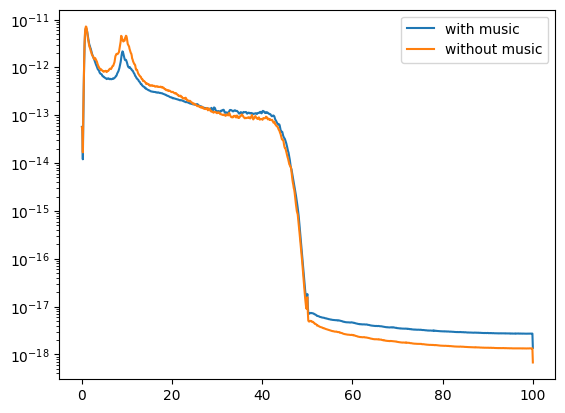

In [12]:
plt.plot(psd.freqs, wet_psd)
plt.plot(psd.freqs, dry_psd)
plt.legend(['with music', 'without music'])
plt.semilogy()
plt.show()

In [13]:
from scipy.stats import ttest_ind
print(ttest_ind(wet_psd, dry_psd))
alpha = 0.05
if ttest_ind(wet_psd, dry_psd).pvalue < alpha:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

TtestResult(statistic=-2.8037194315888563, pvalue=0.005099303057512087, df=2048.0)
Reject null hypothesis


Higher alpha peak observed for resting vs listening